In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [3]:
def naive(data):
    res = pd.DataFrame(data["Sales"].iloc[-1], index=pd.date_range(start=data.index[-1] + data.index.freq, periods=5, freq='MS'), columns=["naive"])
    return res

In [4]:
def simple_average(data):
    res = pd.DataFrame(data["Sales"].mean(), index=pd.date_range(start=data.index[-1] + data.index.freq, periods=5, freq='MS'), columns=["simple_average"])
    return res

In [5]:
def moving_average(data, n):
    res = pd.DataFrame(index=pd.date_range(start=data.index[-1] + data.index.freq, periods=5, freq='MS'), columns=["moving_average"])
    values = data["Sales"].values
    for i in range(5):
        values = np.append(values, np.mean(values[-n:]))
    res["moving_average"] = values[-5:]
    return res

In [6]:
def weighted_average(data, weights):
    weights = np.array(weights)
    res = pd.DataFrame(index=pd.date_range(start=data.index[-1] + data.index.freq, periods=5, freq='MS'), columns=["weighted_average"])
    values = data["Sales"].values
    for i in range(5):
        values = np.append(values, values[-len(weights):].dot(weights.T))
    res["weighted_average"] = values[-5:]
    return res

In [7]:
data = pd.read_csv("shampoo.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)
data = data.asfreq('MS')

<AxesSubplot:xlabel='Month'>

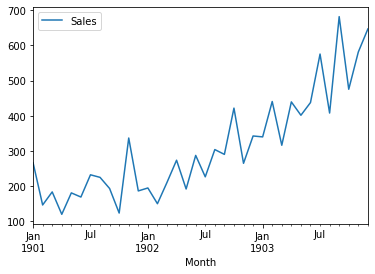

In [8]:
data.plot()

<AxesSubplot:>

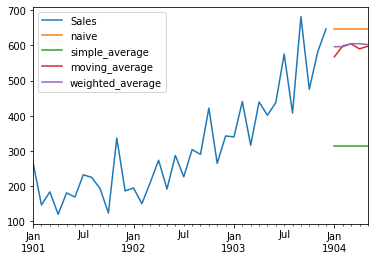

In [9]:
naive_forecast = naive(data)
simple_average_forecast = simple_average(data)
moving_average_forecast = moving_average(data, 3)
weighted_average_forecast = weighted_average(data, [0.1, 0.2, 0.3, 0.4])

pd.concat([data, naive_forecast, simple_average_forecast, moving_average_forecast, weighted_average_forecast], axis=1).plot()